In [659]:
import pandas as pd
import numpy as np
import scipy 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#####                                         Подгружаем данные

In [525]:
olist_customers_dataset = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-m-kuzmin/Project_1/e-commerce/olist_customers_dataset.csv')

In [526]:
olist_orders_dataset = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-m-kuzmin/Project_1/e-commerce/olist_orders_dataset.csv')

In [527]:
olist_order_items_dataset = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-m-kuzmin/Project_1/e-commerce/olist_order_items_dataset.csv')

#####                                 Объединяем все три df в один для удобства

In [528]:
ocd_ood = pd.merge(olist_customers_dataset, olist_orders_dataset, on=('customer_id'), how='left')

In [529]:
full_df = pd.merge(ocd_ood, olist_order_items_dataset, on=('order_id'), how='left')

In [530]:
full_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113420,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25 00:00:00,1.0,ccb4503d9d43d245d3b295d0544f988b,527801b552d0077ffd170872eb49683b,2018-04-12 16:08:45,74.90,13.88
113421,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20 00:00:00,1.0,9ede6b0570a75a4b9de4f383329f99ee,3fd1e727ba94cfe122d165e176ce7967,2018-04-10 08:35:12,114.90,14.16
113422,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02 00:00:00,1.0,7a5d2e1e131a860ae7d18f6fffa9d689,d9e7e7778b32987280a6f2cb9a39c57d,2018-04-12 20:30:03,37.00,19.04
113423,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05 00:00:00,1.0,f819f0c84a64f02d3a5606ca95edd272,4869f7a5dfa277a7dca6462dcf3b52b2,2017-11-09 21:15:51,689.00,22.07


##### Создаю df, который содержит признак покупки full_df_purchase

In [531]:
full_df_purchase = full_df[full_df['order_status'] \
                           .isin(['shipped', 'delivered', 'processing', 'approved'])]

In [532]:
full_df_purchase = full_df_purchase[full_df_purchase['order_approved_at'].notna()]

In [533]:
full_df_purchase.order_purchase_timestamp = full_df_purchase.order_purchase_timestamp.apply(pd.to_datetime)

#####                               0. Исследование и подготовка данных
#####                                     !olist_orders_dataset 
#####               подготовка для дальнейшего мерджа с olist_customers_datase для вопроса №1

#####                                оставляю только подходящие статусы заказов
#####                             ('shipped', 'delivered', 'processing', 'approved')

In [534]:
olist_orders_dataset_purchase = olist_orders_dataset[olist_orders_dataset['order_status'] \
                    .isin(['shipped', 'delivered', 'processing', 'approved'])]

#####                   удаляю строки с NaN из столбца order_approved_at (так как факта оплаты не было)

In [535]:
olist_orders_dataset_purchase = \
                olist_orders_dataset_purchase[olist_orders_dataset_purchase['order_approved_at'].notna()]

#####                                        меняю тип данных для дат

In [536]:
cols = olist_orders_dataset_purchase.columns[3:8]
olist_orders_dataset_purchase[cols] = olist_orders_dataset_purchase[cols].apply(pd.to_datetime)

#####                 Проверяю логику присвоения дат по колонкам между 'order' (должно быть > 0)
#####                           выявлены логические несоответствия дат между:
#####      - передачей заказа в логистическую службу и датой подтверждения оплаты заказа (1359 несоответствий)
#####      - доставкой заказа и передачей заказа в логистическую службу (23 несоответствия)
#####      - обещанной датой доставки и фактической датой доставки (7826).
#####           Несоответвий между датой оплаты заказа и датой создания заказа нет.
#####  Принимая во внимание, что статусы заказов ('order_status') не являются отмененными, недоступными, считаю, что в рабочей системе предприятия могли быть сбои/ошибки или просто человеческий фактор, в связи с чем присваивалась некорректная дата. Принимаю решение оставить в DF данные строки.

In [537]:
check = olist_orders_dataset_purchase

In [538]:
check['approved_created'] = \
(olist_orders_dataset_purchase['order_approved_at'] - \
                                    olist_orders_dataset_purchase['order_purchase_timestamp']).dt.days
check['approved_created'].unique()
len(check[check['approved_created'] < 0])

0

In [539]:
check['carrier_approved'] = \
(olist_orders_dataset_purchase['order_delivered_carrier_date'] - \
                                            olist_orders_dataset_purchase['order_approved_at']).dt.days
check['carrier_approved'].unique()
len(check[check['carrier_approved'] < 0])

1359

In [540]:
check['customer_carrier'] = \
(olist_orders_dataset_purchase['order_delivered_customer_date'] - \
                                 olist_orders_dataset_purchase['order_delivered_carrier_date']).dt.days
check['customer_carrier'].unique()
len(check[check['customer_carrier'] < 0])

23

In [541]:
check['estimated_delivered'] = \
(olist_orders_dataset_purchase['order_estimated_delivery_date'] - \
                                olist_orders_dataset_purchase['order_delivered_customer_date']).dt.days
check['estimated_delivered'].unique()
len(check[check['estimated_delivered'] < 0])

7826

#####                   удаляю столбцы, которые использовал для нахождения разницы между 'order'

In [542]:
olist_orders_dataset_purchase = \
    olist_orders_dataset_purchase.drop(olist_orders_dataset_purchase.columns[[8, 9, 10, 11]], axis=1)

#####  удаляю столбцы из таблицы olist_orders_dataset_purchase, так как пока они не нужны и создаю новый DF

In [543]:
oodp_nodata = \
    olist_orders_dataset_purchase.drop(olist_orders_dataset_purchase.columns[[3, 4, 5, 6, 7]], axis=1)

In [544]:
oodp_nodata

,order_id,customer_id,order_status
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered
...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered


#####             1. Сколько у нас пользователей, которые совершили покупку только один раз?

#####   объединяю olist_customers_dataset И oodp_nodata для нахождения customer_unique_id через customer_id 

In [545]:
oodp_nodata_ocd = pd.merge(olist_customers_dataset, oodp_nodata, on=('customer_id'), how='left')

In [546]:
oodp_nodata_ocd

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered
...,...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered


##### удаляю строки с NaN(1567 строк), так как к ним нет индентификатора заказа(номера чека),  а значит нет покупок.

In [547]:
oodp_nodata_ocd = oodp_nodata_ocd[oodp_nodata_ocd['order_id'].notna()]

#####                               всего уникальных customer_unique_id = 94 675

In [548]:
oodp_nodata_ocd['customer_unique_id'].nunique()

94675

##### Решение к вопросу №1

In [549]:
one_order_unique = oodp_nodata_ocd[['customer_id', 'customer_unique_id']]

In [550]:
one_order_unique = one_order_unique.groupby('customer_unique_id').agg({'customer_id' : 'count'})\
                .sort_values('customer_id').reset_index()

In [551]:
one_order_unique.loc[one_order_unique['customer_id'] == 1]

,customer_unique_id,customer_id
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,a9312d3f089577687589a60c7955baa5,1
2,a9311df21a0a446cd8a0a749d08c77ac,1
3,a930016dbc02c5ec1f9703a25414aabb,1
4,a92f6790027e4cb823b2a1423382433d,1
...,...,...
91799,4283cbb478c4f1a13718c799779ddf15,1
91800,42a32de77a81d7864ea2f5cf3a6df9ec,1
91801,55029bc1da750ad2d53eb1d189bcfada,1
91802,55bb89d4c9e83251c6d298c9105e240a,1


#####                                      ОТВЕТ НА ВОПРОС №1
#####                 уникальных пользователей совершивших покупку один раз = 91 804

### _____

##### 2. Сколько заказов в месяц в среднем не доставляется по разным причинам(вывести детализацию по причинам)?

#####                               используем df olist_orders_dataset для решения задачи

In [552]:
olist_orders_dataset.head(1)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00


#####                          создаем df где все заказы без статуса "delivered"

In [553]:
without_delivery = olist_orders_dataset.loc[olist_orders_dataset['order_status'] != 'delivered']

#####                меняем тип данных столбца order_purchase_timestamp и оставляем только год и месяц

In [554]:
without_delivery['order_purchase_timestamp'] = \
                  pd.to_datetime(without_delivery['order_purchase_timestamp'], errors='coerce')

In [555]:
without_delivery.order_purchase_timestamp = without_delivery.order_purchase_timestamp.dt.strftime('%Y-%m')

#####        группируем по статусу заказа и времни создания заказа, и считаем кол-во заказов по order_id

In [556]:
without_delivery_status = without_delivery.groupby(['order_status', 'order_purchase_timestamp']) \
                                          .agg({'order_id' : 'count'}) \
                                          .reset_index()
without_delivery_status

,order_status,order_purchase_timestamp,order_id
0,approved,2017-02,1
1,approved,2017-04,1
2,canceled,2016-09,2
3,canceled,2016-10,24
4,canceled,2017-01,3
...,...,...,...
108,unavailable,2018-04,5
109,unavailable,2018-05,16
110,unavailable,2018-06,4
111,unavailable,2018-07,18


In [557]:
without_delivery_status.rename(columns={'order_id': 'cancelled_mean'}, inplace=True)

####                                     Решение к вопросу №2

In [558]:
wds = without_delivery_status[without_delivery_status['order_status'] \
                       .isin(["unavailable", "canceled"])] \
                       .groupby('order_status') \
                       .agg({'cancelled_mean' : 'mean'}) \
                       .sort_values('cancelled_mean', ascending=False) \
                       .round(2) \
                       .reset_index()
wds

,order_status,cancelled_mean
0,unavailable,29.00
1,canceled,26.04


####                                      ОТВЕТ НА ВОПРОС №2
#####       Так как большинство заказов находятся в "статусах", которые являются нормальными этапами обработки заказа, врамках ответа на вопрос №2 учитываем только статусы: unavailable и canceled.
##### В месяц в среднем не доставляется заказы по следующим причинам: unavailable(29 заказов) и canceled(26 закзаов)

# _____

###           3. По каждому товару определить, в какой день недели товар чаще всего покупается.

#####       Присваиваем для переменных нужные df и удаляем ненужные столбцы для дальнейшего объединения df

In [559]:
best_day_1=olist_order_items_dataset

In [560]:
best_day_2=olist_orders_dataset_purchase

In [561]:
best_day_1 = best_day_1.drop(best_day_1.columns[[1, 3, 4, 5, 6]], axis=1)

In [562]:
best_day_2 = best_day_2.drop(best_day_2.columns[[2, 4, 5, 6, 7]], axis=1)

#####   объединяем в один df, удаляем пропущенные значения, меняем формат колонок с датой 

In [563]:
items = pd.merge(best_day_1, best_day_2, on=('order_id'), how='left')

In [564]:
items.dropna(inplace=True)

In [565]:
items.order_purchase_timestamp = items.order_purchase_timestamp.dt.strftime('%Y-%m-%d')

In [566]:
items['date'] = pd.to_datetime(items['order_purchase_timestamp'])

In [567]:
items = items.drop(items.columns[[4]], axis=1)

In [568]:
items['order_purchase_timestamp'] = pd.to_datetime(items['order_purchase_timestamp'], errors='coerce')

In [569]:
items['date'] = pd.to_datetime(items['order_purchase_timestamp'])

In [570]:
items['date'] = items['order_purchase_timestamp'].dt.day_name()

In [571]:
items = items.drop(items.columns[[3]], axis=1)

##### группируем по id и дате для получения нужных данных для ответа на вопрос №3

In [572]:
top_day = items.groupby(["product_id", "date"], as_index=False) \
               .agg({"customer_id": "count"}) \
               .sort_values(by="customer_id", ascending=False) \
               .drop_duplicates(subset='product_id')

#####                                     ОТВЕТ НА ВОПРОС №3

##### Список товаров с днями недели, в которые он(товар) продавался чаще всего.

In [573]:
top_day

,product_id,date,customer_id
15763,422879e10f46682990de24d770e7f83d,Wednesday,93
36172,99a4788cb24856965c36a24e339b6058,Monday,92
40673,aca2eb7d00ea1a7b8ebd4e68314663af,Thursday,89
19940,53b36df67ebb7c41585e8d54d6772e08,Tuesday,76
13419,389d119b48cf3043d311335e499d9c6b,Thursday,67
...,...,...,...
23808,643a4049ae3e6df63858575f28cd7b21,Friday,1
23810,643a66b1dc5dad3de6cb5a41549e72f1,Sunday,1
23812,643f86cfb81c8ef89293524c5cd78435,Thursday,1
23813,64436613065a92eedd50d29d4ec0cd43,Friday,1


#####                            кол-во купленных товаров по дням недели + барплот

In [574]:
tod_day_statistic = top_day.groupby('date')\
                           .agg({'customer_id' : 'sum'})\
                           .sort_values('customer_id', ascending=False)\
                           .rename({'customer_id': 'total_buy'}, axis=1)\
                           .reset_index()

In [575]:
tod_day_statistic

,date,total_buy
0,Monday,10162
1,Tuesday,8968
2,Wednesday,8548
3,Friday,8239
4,Thursday,7942
5,Sunday,5754
6,Saturday,4976


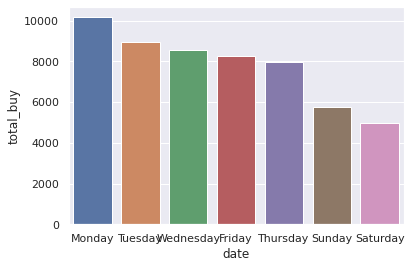

In [576]:
sns.barplot(x='date',y='total_buy', data=tod_day_statistic)

##### ______

#####               4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? 
#####               Не стоит забывать, что внутри месяца может быть не целое количество недель. 
#####               Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть.

#####  Создаю из общего df необходимый df для решения + удаляю ненужные статусы 

In [578]:
purchases_2 = full_df_purchase.groupby(['order_id', 'order_purchase_timestamp', 'customer_unique_id', 'order_status', 'order_approved_at']) \
.agg({'price' : 'sum'}).reset_index()

##### Сортирую df по признакам покупки + удаляю строки с NaN из столбца order_approved_at (так как факта оплаты не было)

In [580]:
df4_purchase = purchases_2[purchases_2['order_status'].isin(['shipped', 'delivered', 'processing', 'approved'])]

In [581]:
df4_purchase = df4_purchase[df4_purchase['order_approved_at'].notna()]

##### удаляю ненужные столбцы + меняю тип данных и формат для колонок с датой

In [582]:
df4_purchase['order_purchase_timestamp']= pd.to_datetime(df4_purchase['order_purchase_timestamp'])

In [583]:
df4_purchase['order_purchase_timestamp'] = df4_purchase['order_purchase_timestamp'].dt.strftime('%Y-%m')

#####  отсекаю крайние значения данных по датам сентябрь 2016 и сентябрь 2018, так как месяцы неполные

In [643]:
df4_purchase = df4_purchase[(df4_purchase['order_purchase_timestamp'] > '2016-10-01') \
               & (df4_purchase['order_purchase_timestamp'] < '2018-09-30')]

#####                  Группирую df по кол-ву покупок по каждому пользователю в месяц

In [644]:
unique_purchases_by_month = \
        df4_purchase.groupby(['customer_unique_id', 'order_purchase_timestamp'], as_index=False) \
                    .agg({'order_id' : 'count'})

In [645]:
unique_purchases_by_month

,customer_unique_id,order_purchase_timestamp,order_id
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05,1
2,0000f46a3911fa3c0805444483337064,2017-03,1
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10,1
4,0004aac84e0df4da2b147fca70cf8255,2017-11,1
...,...,...,...
96268,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06,1
96269,fffea47cd6d3cc0a88bd621562a9d061,2017-12,1
96270,ffff371b4d645b6ecea244b27531430a,2017-02,1
96271,ffff5962728ec6157033ef9805bacc48,2018-05,1


#####          Добавляю новую колонку с кол-вом дней в каждом месяце при помощи dt.days_in_month

In [646]:
unique_purchases_by_month['order_purchase_timestamp']= \
                        pd.to_datetime(unique_purchases_by_month['order_purchase_timestamp'])

In [647]:
unique_purchases_by_month['days'] = unique_purchases_by_month.order_purchase_timestamp.dt.days_in_month

In [648]:
unique_purchases_by_month

,customer_unique_id,order_purchase_timestamp,order_id,days
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01,1,31
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-01,1,31
2,0000f46a3911fa3c0805444483337064,2017-03-01,1,31
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-01,1,31
4,0004aac84e0df4da2b147fca70cf8255,2017-11-01,1,30
...,...,...,...,...
96268,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-01,1,30
96269,fffea47cd6d3cc0a88bd621562a9d061,2017-12-01,1,31
96270,ffff371b4d645b6ecea244b27531430a,2017-02-01,1,28
96271,ffff5962728ec6157033ef9805bacc48,2018-05-01,1,31


In [649]:
unique_purchases_by_month["bought_in_one_week"] = \
        (unique_purchases_by_month.order_id / (unique_purchases_by_month.days / 7))

#####                                     ОТВЕТ НА ВОПРОС №4

In [650]:
unique_purchases_by_month_final = \
        unique_purchases_by_month.rename({'order_purchase_timestamp': 'date',\
                                          'customer_id' : 'QTY', 'days' : 'days_in_the_month'},\
                                           axis=1) \
                                 .round(2)

In [651]:
unique_purchases_by_month_final.sort_values('bought_in_one_week', ascending=False)

,customer_unique_id,date,order_id,days_in_the_month,bought_in_one_week
7194,12f5d6e1cbf93dafd9dcc19095df0b3d,2017-01-01,6,31,1.35
23501,3e43e6105506432c953e165fb2acf44c,2018-02-01,4,28,1.00
61078,a239b8e2fbce33780f1f1912e2ee5275,2017-02-01,4,28,1.00
68140,b4e4f24de1e8725b74e4a1f4975116ed,2018-02-01,4,28,1.00
66534,b08fab27d47a1eb6deda07bfd965ad43,2017-09-01,4,30,0.93
...,...,...,...,...,...
33659,5925dfa8cd87ab4d852383f7039c8bc2,2018-03-01,1,31,0.23
33658,5925dfa8cd87ab4d852383f7039c8bc2,2017-09-01,1,30,0.23
33656,592596924fbb356d2f929f3a57b0187d,2018-08-01,1,31,0.23
33655,59256ff8388feafafdc297f868dea116,2018-03-01,1,31,0.23


##### Для удобства визуализации ТОП20 покупок (в среднем) ввожу колонку с дублированием индексов, для более компактного отображения в барплот и поиску в df нужных строк

In [652]:
unique_purchases_by_month_final_top20 = unique_purchases_by_month_final

In [653]:
unique_purchases_by_month_final_top20['index']=unique_purchases_by_month_final_top20.index

In [654]:
unique_purchases_by_month_final_top20 = unique_purchases_by_month_final_top20 \
                                        .sort_values('bought_in_one_week', ascending=False).head(20)

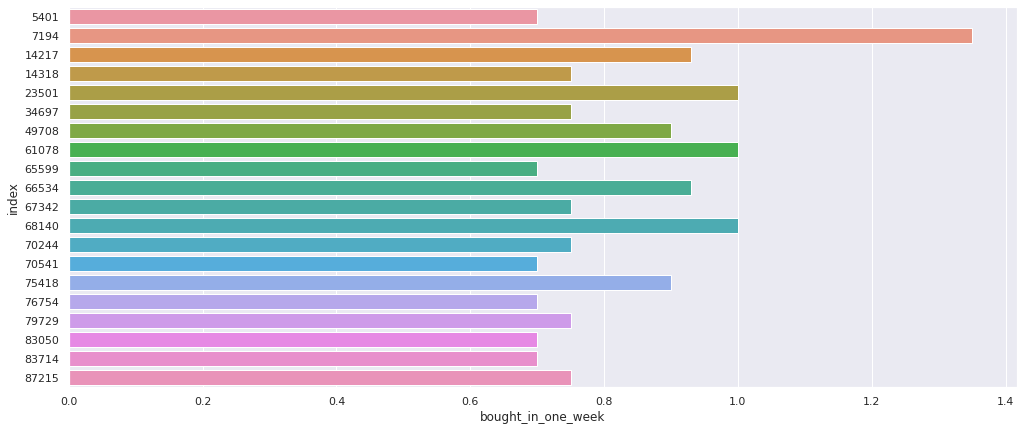

In [655]:
sns.barplot(x='bought_in_one_week', y='index', data=unique_purchases_by_month_final_top20, orient='h')

#####                      5. Используя pandas, проведи когортный анализ пользователей. 
#####            В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц.

#####       создаем новый df(normal_df) для решения задачи, где добавляем колонку датой первой покупки

In [597]:
df5 = full_df_purchase.groupby(['customer_unique_id', 'order_id', 'order_purchase_timestamp'], \
                               as_index=False) \
                      .agg({'order_id': 'count'})

In [656]:
first_buy_df = full_df_purchase.groupby('customer_unique_id', as_index = False) \
                      .agg({'order_purchase_timestamp': 'min'}) \
                      .rename(columns = {'order_purchase_timestamp': 'first_buy'})

In [600]:
first_buy_df

,customer_unique_id,first_buy
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42
...,...,...
94670,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36
94671,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56
94672,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16
94673,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41


In [601]:
normal_df = pd.merge(df5, first_buy_df, on=('customer_unique_id'), how='left')

In [602]:
normal_df

,customer_unique_id,order_purchase_timestamp,order_id,first_buy
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,1,2018-05-10 10:56:27
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,1,2018-05-07 11:11:27
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,1,2017-03-10 21:05:03
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,1,2017-10-12 20:29:41
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,1,2017-11-14 19:45:42
...,...,...,...,...
97869,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36,2,2017-06-08 21:00:36
97870,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56,1,2017-12-10 20:07:56
97871,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16,1,2017-02-07 15:49:16
97872,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41,1,2018-05-02 15:17:41


#####                         приводим колонки с датой в нужный нам формат

In [603]:
normal_df['order_purchase_timestamp']= pd.to_datetime(normal_df['order_purchase_timestamp'])

In [604]:
normal_df['first_buy']= pd.to_datetime(normal_df['first_buy'])

In [605]:
normal_df['first_buy'] = normal_df['first_buy'].dt.strftime('%Y-%m')

In [606]:
normal_df['order_purchase_timestamp'] = normal_df['order_purchase_timestamp'].dt.strftime('%Y-%m')

#####                         группируем и считаем кол-во id заказов и уникальных id

In [607]:
orderid_count = normal_df.groupby(['first_buy', 'order_purchase_timestamp', "customer_unique_id"], \
                                  as_index = False) \
               .agg({'order_id': 'count'}) 

In [608]:
orderid_count

,first_buy,order_purchase_timestamp,customer_unique_id,order_id
0,2016-09,2016-09,830d5b7aaa3b6f1e9ad63703bec97d23,1
1,2016-09,2016-09,b7d76e111c89f7ebf14761390f0f7d17,1
2,2016-10,2016-10,0032c76b20340da25249092a268ce66c,1
3,2016-10,2016-10,01f156677184504063bd19739f924af1,1
4,2016-10,2016-10,0313291a6f4f16df04dcf819d88c38ef,1
...,...,...,...,...
96542,2018-08,2018-08,ffc4e1cd8aa220763480d0a18157c45d,1
96543,2018-08,2018-08,ffe204b1bb8026741b839085b2fd10f2,1
96544,2018-08,2018-08,ffec490ab531184a483efe2eedd68908,1
96545,2018-08,2018-08,fff96bc586f78b1f070da28c4977e810,1


In [609]:
unique_id = orderid_count.groupby(['first_buy', 'order_purchase_timestamp'], as_index = False) \
                  .agg({'customer_unique_id': 'count'})

In [610]:
unique_id

,first_buy,order_purchase_timestamp,customer_unique_id
0,2016-09,2016-09,2
1,2016-10,2016-10,272
2,2016-10,2017-04,1
3,2016-10,2017-07,1
4,2016-10,2017-09,1
...,...,...,...
215,2018-06,2018-08,16
216,2018-07,2018-07,6004
217,2018-07,2018-08,31
218,2018-08,2018-08,6187


In [611]:
chrt_id = unique_id.groupby('first_buy', as_index = False) \
                .agg({'customer_unique_id': 'max'})

In [612]:
unique_id = pd.merge(unique_id, chrt_id, on=('first_buy'), how='left')

In [613]:
unique_id['retention'] = unique_id['customer_unique_id_x'] / unique_id['customer_unique_id_y']

#####                                       ОТВЕТ НА ВОПРОС №5
#####                                     
#####                     готовим df с когортами по дате первого заказа + клиенты

In [614]:
chrt = unique_id.pivot_table(index = 'first_buy',columns = 'order_purchase_timestamp',values = 'retention')

In [615]:
chrt = chrt.query("'2017-01' <= first_buy <= '2017-12'")

In [642]:
chrt

order_purchase_timestamp,2016-09,2016-10,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09
first_buy,,,,,,,,,,,,,,,,,,,,,,,,
2017-01,NaN,NaN,NaN,1.0,0.004065,0.00271,0.001355,0.004065,0.001355,0.004065,0.001355,0.001355,NaN,0.004065,0.001355,0.006775,0.004065,0.001355,0.001355,0.002710,0.004065,NaN,0.001355,NaN
2017-02,NaN,NaN,NaN,NaN,1.000000,0.00240,0.002999,0.001200,0.004199,0.001200,0.002400,0.001800,0.000600,0.001800,0.001200,0.002999,0.001200,0.001800,0.001200,0.000600,0.000600,0.002400,NaN,NaN
2017-03,NaN,NaN,NaN,NaN,NaN,1.00000,0.005062,0.003505,0.003894,0.003505,0.001558,0.001558,0.003115,0.003505,0.000779,0.003505,0.001168,0.002336,0.001168,0.001558,0.002336,0.000779,0.001558,NaN
2017-04,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.006058,0.002164,0.001731,0.003029,0.002596,0.003462,0.003029,0.003029,0.001731,0.002596,0.000865,0.000433,0.000433,0.000865,0.000865,0.001298,NaN
2017-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.004823,0.004823,0.003972,0.003121,0.003404,0.004255,0.001418,0.002553,0.002553,0.002553,0.003404,0.002553,0.000284,0.001986,0.002270,NaN
2017-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.004525,0.003555,0.003878,0.002586,0.003555,0.003555,0.002262,0.001293,0.002262,0.003232,0.003232,0.001616,0.001293,0.001939,NaN
2017-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.005242,0.003408,0.002359,0.002883,0.002097,0.003145,0.001048,0.001835,0.002621,0.002097,0.002883,0.001311,0.002621,NaN
2017-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.006809,0.003405,0.002675,0.003648,0.005350,0.002918,0.002675,0.001459,0.001459,0.002432,0.001946,0.001216,NaN
2017-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.006897,0.005419,0.002956,0.004433,0.002217,0.002217,0.002463,0.002956,0.001724,0.002709,0.000739,NaN


In [616]:
pd.set_option('max_columns', None)

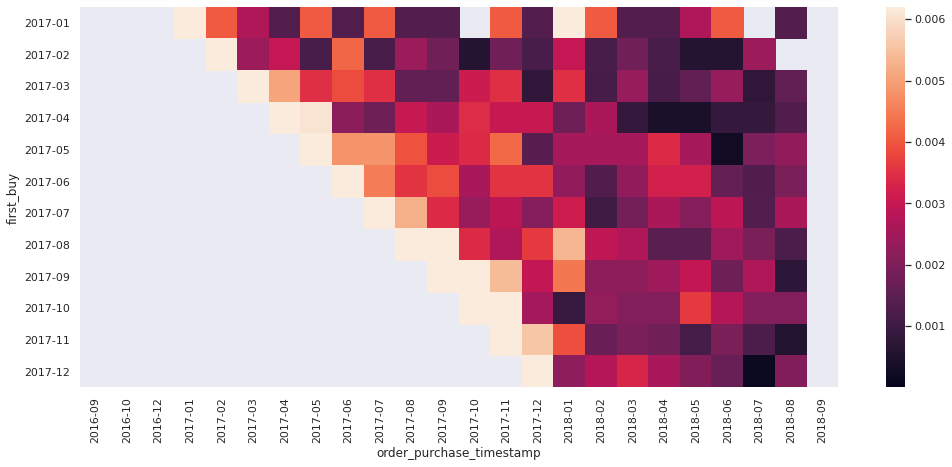

In [618]:
sns.set(rc={"figure.figsize": (17, 7)})
sns.heatmap(chrt, vmin=0.0000010, vmax = 0.0062)


##### ОТВЕТ(2017-05, 0.003972)

# _____

#####        6. Часто для качественного анализа аудитории используют подходы, основанные на сегментации.
##### Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию.
##### В кластеризации можешь выбрать следующие метрики: 
##### R - время от последней покупки пользователя до текущей даты, 
##### F - суммарное количество покупок у пользователя за всё время, 
##### M - сумма покупок за всё время.
##### Подробно опиши, как ты создавал кластеры. Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров. 
##### Пример такого описания: RFM-сегмент 132 (recency=1, frequency=3, monetary=2) имеет границы метрик recency от 130 до 500 дней, frequency от 2 до 5 заказов в неделю, monetary от 1780 до 3560 рублей в неделю.
##### R (Recency) — насколько давно клиент сделал последний заказ.
##### F (Frequency) — сколько всего заказов сделал клиент.
##### M (Monetary) — сколько денег клиент потратил

#####  Готовим df для работы (оставляем нужные столбцы, удаляем строки с Nan (всего одна строка), убраем из даты время для удоства, присваиваем переменной last_order_date дату последнего совершенного заказа из нашего df (2018-09-03)

In [619]:
last_order_date = full_df_purchase.order_purchase_timestamp.max()

In [620]:
full_df_purchase.dtypes

customer_id                              object
customer_unique_id                       object
customer_zip_code_prefix                  int64
customer_city                            object
customer_state                           object
order_id                                 object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                        object
order_delivered_carrier_date             object
order_delivered_customer_date            object
order_estimated_delivery_date            object
order_item_id                           float64
product_id                               object
seller_id                                object
shipping_limit_date                      object
price                                   float64
freight_value                           float64
dtype: object

In [621]:
full_df_purchase.order_purchase_timestamp.max()

Timestamp('2018-09-03 09:06:57')

##### Считаем кол-во покупок

In [622]:
purchases = full_df_purchase.groupby(['order_id', 'order_purchase_timestamp', 'customer_unique_id'], \
                                    as_index=False).agg({'price': 'sum'})
purchases

,order_id,order_purchase_timestamp,customer_unique_id,price
0,00010242fe8c5a6d1ba2dd792cb16214,2017-09-13 08:59:02,871766c5855e863f6eccc05f988b23cb,58.90
1,00018f77f2f0320c557190d7a144bdd3,2017-04-26 10:53:06,eb28e67c4c0b83846050ddfb8a35d051,239.90
2,000229ec398224ef6ca0657da4fc703e,2018-01-14 14:33:31,3818d81c6709e39d06b2738a8d3a2474,199.00
3,00024acbcdf0a6daa1e931b038114c75,2018-08-08 10:00:35,af861d436cfc08b2c2ddefd0ba074622,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,2017-02-04 13:57:51,64b576fb70d441e8f1b2d7d446e483c5,199.90
...,...,...,...,...
97869,fffc94f6ce00a00581880bf54a75a037,2018-04-23 13:57:06,0c9aeda10a71f369396d0c04dce13a64,299.99
97870,fffcd46ef2263f404302a634eb57f7eb,2018-07-14 10:26:46,0da9fe112eae0c74d3ba1fe16de0988b,350.00
97871,fffce4705a9662cd70adb13d4a31832d,2017-10-23 17:07:56,cd79b407828f02fdbba457111c38e4c4,99.90
97872,fffe18544ffabc95dfada21779c9644f,2017-08-14 23:02:59,eb803377c9315b564bdedad672039306,55.99


##### Создаем колонку с данными о прошедших днях от последней покупки

In [623]:
purchases['last_purchase'] = purchases.order_purchase_timestamp.apply(lambda x: (last_order_date - x).days)

In [624]:
purchases.head(3)

,order_id,order_purchase_timestamp,customer_unique_id,price,last_purchase
0,00010242fe8c5a6d1ba2dd792cb16214,2017-09-13 08:59:02,871766c5855e863f6eccc05f988b23cb,58.9,355
1,00018f77f2f0320c557190d7a144bdd3,2017-04-26 10:53:06,eb28e67c4c0b83846050ddfb8a35d051,239.9,494
2,000229ec398224ef6ca0657da4fc703e,2018-01-14 14:33:31,3818d81c6709e39d06b2738a8d3a2474,199.0,231


##### Приступаем к созданию RFM

In [625]:
group = {'last_purchase': lambda x: x.min(), 'order_id': 'count', 'price': 'sum'}

In [626]:
RFM = purchases.groupby('customer_unique_id') \
               .agg(group) \
               .rename(columns={'last_purchase': 'Recency','order_id': 'Frequency', 'price': 'Monetary'}) \
               .reset_index()

In [627]:
RFM

,customer_unique_id,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,115,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118,1,18.90
2,0000f46a3911fa3c0805444483337064,541,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,325,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,292,1,180.00
...,...,...,...,...
94670,fffcf5a5ff07b0908bd4e2dbc735a684,451,1,1570.00
94671,fffea47cd6d3cc0a88bd621562a9d061,266,1,64.89
94672,ffff371b4d645b6ecea244b27531430a,572,1,89.90
94673,ffff5962728ec6157033ef9805bacc48,123,1,115.00


##### Визуализируем и посмотрим на распределение Recency, Frequency , Monetary

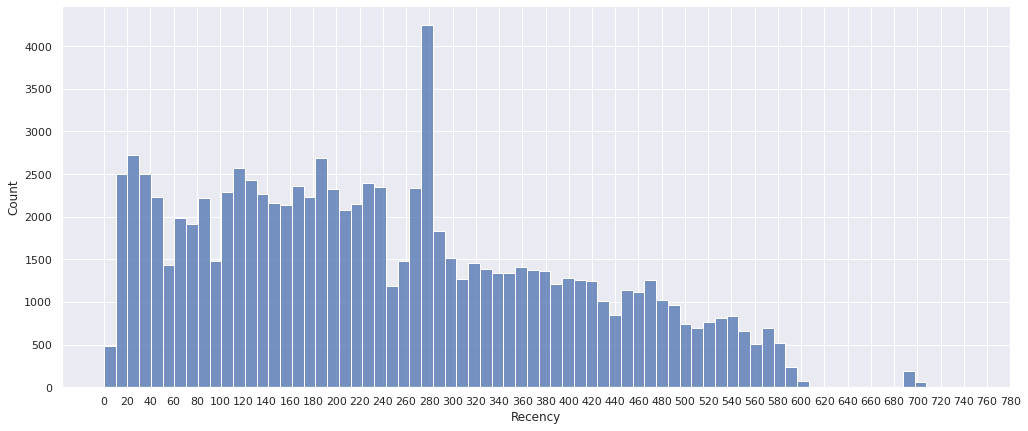

In [628]:
sns.set(style="darkgrid", rc={"figure.figsize": (17, 7)})
ax = sns.histplot(RFM.Recency)
ax.set_xticks(range(0, 800, 20))
sns.despine()

In [629]:
RFM.Recency.max()

728

In [630]:
RFM.Recency.describe()

count    94675.000000
mean       242.207309
std        152.802404
min          0.000000
25%        118.000000
50%        223.000000
75%        351.000000
max        728.000000
Name: Recency, dtype: float64

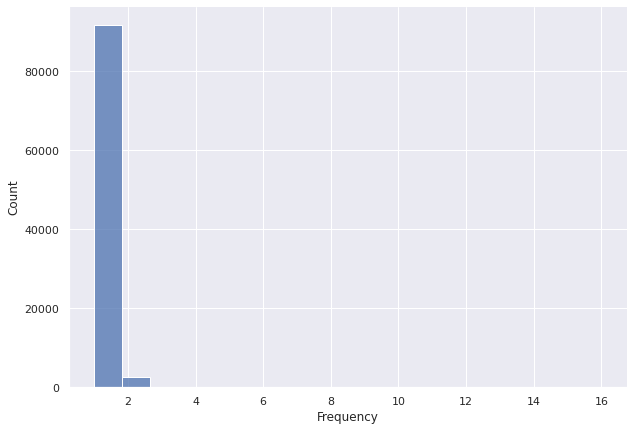

In [631]:
sns.set(style="darkgrid", rc={"figure.figsize": (10, 7)})
ax = sns.histplot(RFM.Frequency)
sns.despine()

In [632]:
RFM.Frequency.max()

16

In [633]:
RFM.Frequency.describe()

count    94675.000000
mean         1.033789
std          0.210698
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         16.000000
Name: Frequency, dtype: float64

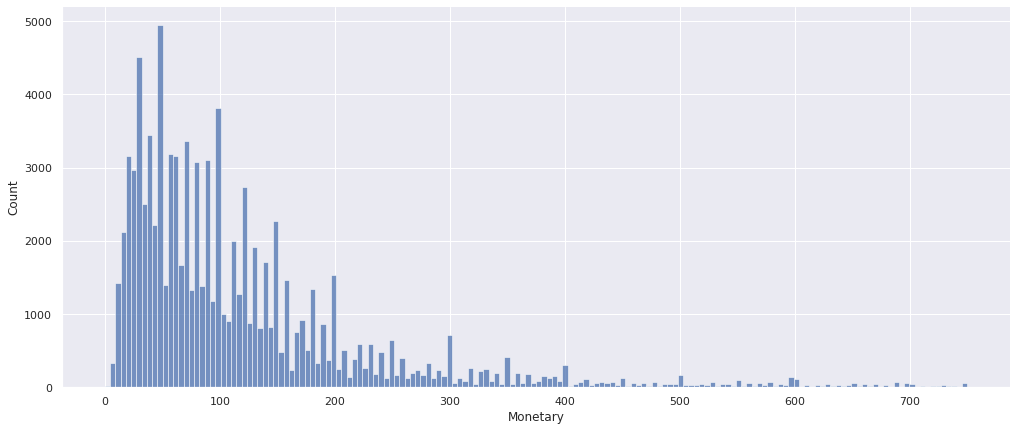

In [634]:
sns.set(style="darkgrid", rc={"figure.figsize": (17, 7)})
ax = sns.histplot(RFM.Monetary.loc[RFM.Monetary <= 750])
sns.despine()

In [635]:
RFM.Monetary.max()

13440.0

In [636]:
RFM.Monetary.describe()

count    94675.000000
mean       141.866427
std        215.721800
min          0.000000
25%         47.800000
50%         89.800000
75%        154.910000
max      13440.000000
Name: Monetary, dtype: float64

### На основе полученной информации, распределяем значения RFM следующим образом:

##### Recency
##### 1 - заказывал не давно (0 - 189)
##### 2 - клиент в "простое" (190 - 359)
##### 3 - заказывал давно (360 - 727)

##### Frequency
##### 3 - покупал  мало (0-1)
##### 2 - покупал средне (1-2)
##### 1 - покупал много (2-16)

##### Monetary
##### 3 - чек  маленький (0-90)
##### 2 - чек средний (90-350)
##### 1 - чек большой (350-13441)


In [637]:
RFM['range_R'] = pd.cut(RFM.Recency, [-1, 190, 360, 728], labels=['1', '2', '3']).astype(str)
RFM['range_F'] = pd.cut(RFM.Frequency, [-1, 1, 2, 16], labels=['3', '2', '1']).astype(str)
RFM['range_M'] = pd.cut(RFM.Monetary, [-1, 90, 350, 13441], labels=['3', '2', '1']).astype(str)

##### Объединяем подгруппы в одну и получаем требуемый результат, в котором видим, что ТОП-5 пользователей относятся к следующим группам RFM:
##### 1. 133

##### 2. 233

##### 3. 132

##### 4. 232

##### 5. 333
##### Из чего можем сделать вывод, что  большинство пользователей покупает мало товаров и на небольшую сумму, а большинство клиентов чаще покупает в диапозоне от 0 до 359 дней.

#####  Для наглядности распредления RFM сделаем ТОП-15 групп RFM по кол-ву пользователей и визуализируемна барплоте.

In [638]:
RFM['RFM_TOTAL'] = RFM['range_R'] + RFM['range_F'] + RFM['range_M']

In [639]:
RFM_stat = RFM.groupby('RFM_TOTAL') \
              .agg({'customer_unique_id' : 'count', 'Monetary' : 'sum'}) \
              .sort_values('customer_unique_id', ascending=False) \
              .reset_index()
RFM_stat.head(15)

,RFM_TOTAL,customer_unique_id,Monetary
0,133,20118,973385.68
1,233,16729,824220.78
2,132,16197,2633589.19
3,232,12556,2074994.36
4,333,11895,581213.80
5,332,8470,1410992.08
6,131,2543,1844999.78
7,231,1881,1296861.49
8,331,1415,1047845.99
9,122,767,148107.01


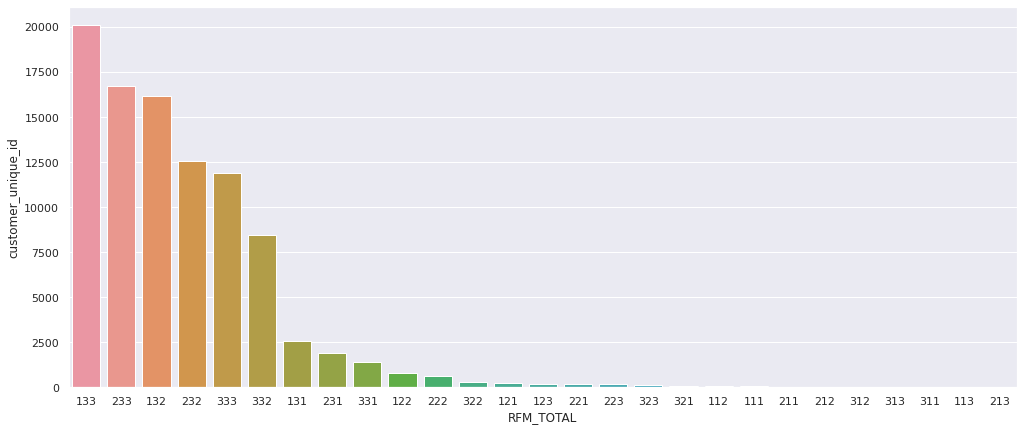

In [640]:
sns.barplot(x='RFM_TOTAL', y='customer_unique_id', data=RFM_stat)